In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [47]:
#Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [48]:
#Replace bmi missing value with mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [49]:
#Check again missing values for BMI
missing_values = data.isnull().sum()
print(missing_values)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [50]:
#Print first 5 rows of the data
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [51]:
#Hot Encoded Data
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


In [52]:
data_encoded.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [53]:
data_encoded.shape

(5110, 18)

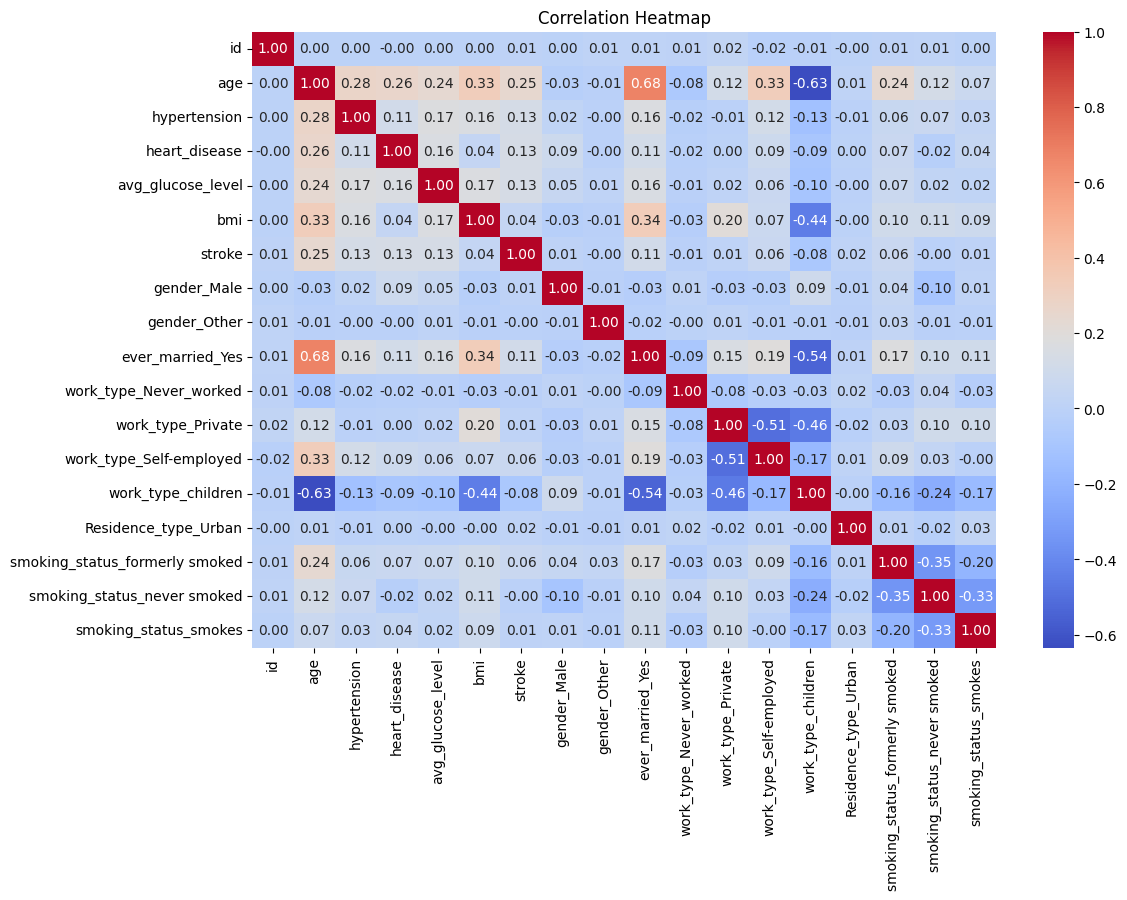

In [54]:
corr_matrix = data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

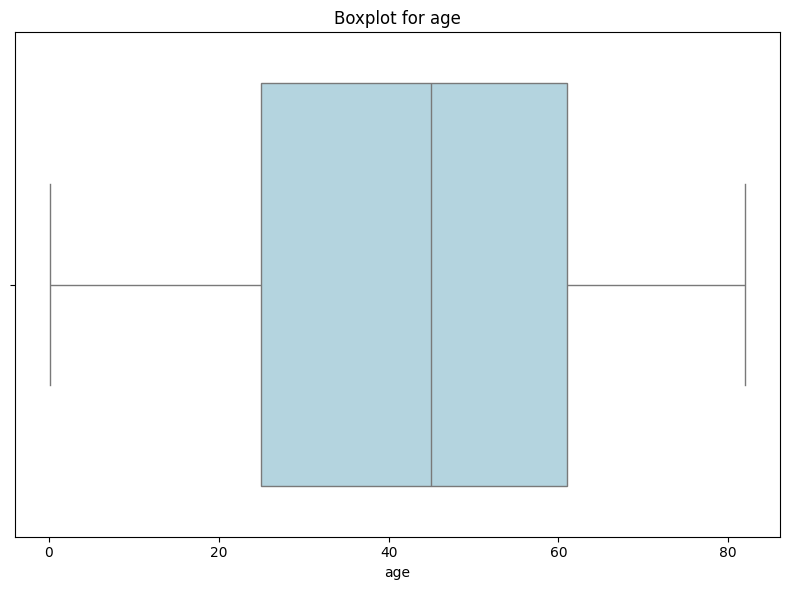

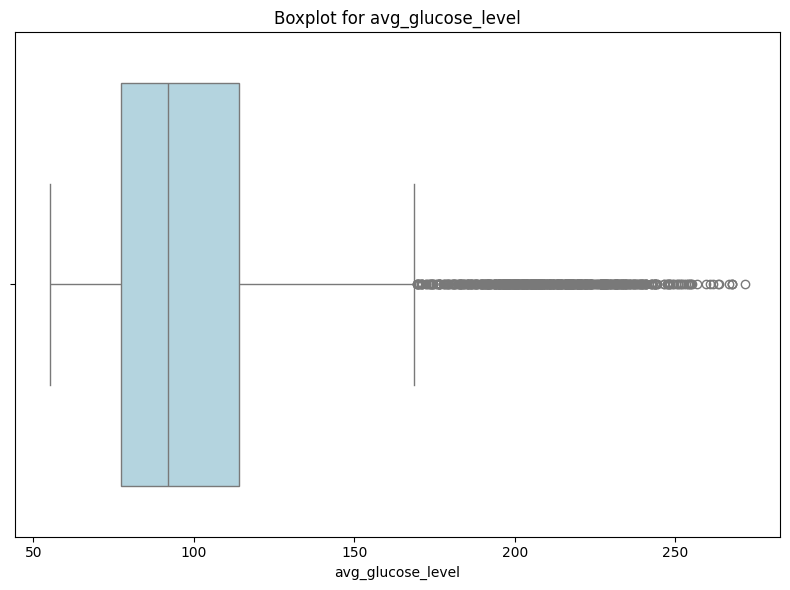

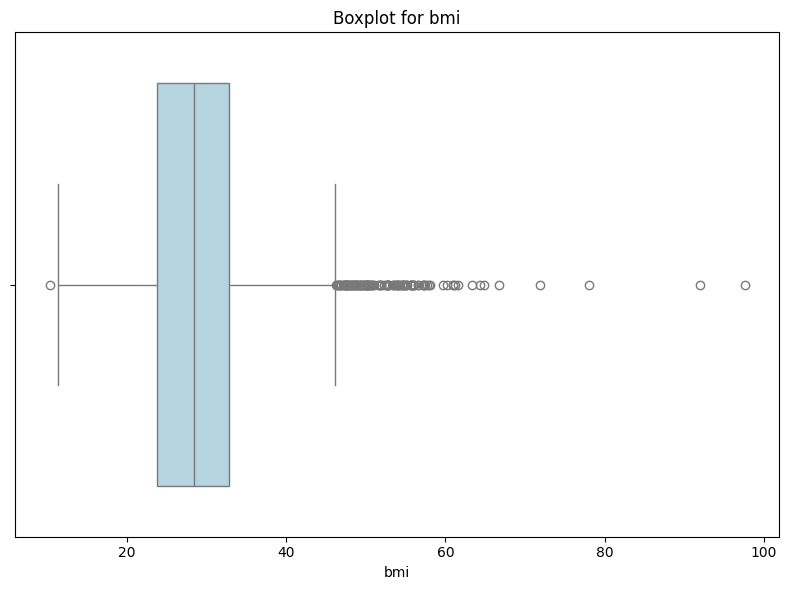

In [55]:
# Step 5: Detect Outliers Using Boxplots
# List of numerical columns
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Generate boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


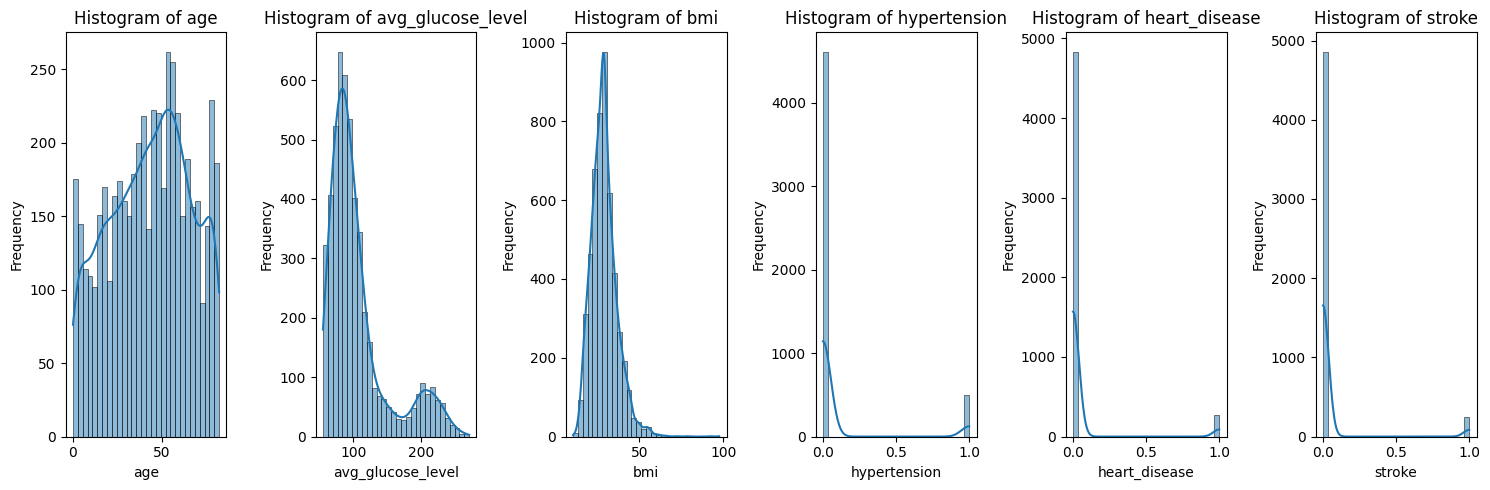

In [56]:
# List of numerical columns
numerical_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']

# Create histograms for each numerical column
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Scaled numerical columns (first 5 rows):
        age  avg_glucose_level       bmi  hypertension  heart_disease  stroke
0  0.816895           0.801265  0.301260           0.0            1.0     1.0
1  0.743652           0.679023  0.212981           0.0            0.0     1.0
2  0.975586           0.234512  0.254296           0.0            1.0     1.0
3  0.597168           0.536008  0.276060           0.0            0.0     1.0
4  0.963379           0.549349  0.156930           1.0            0.0     1.0


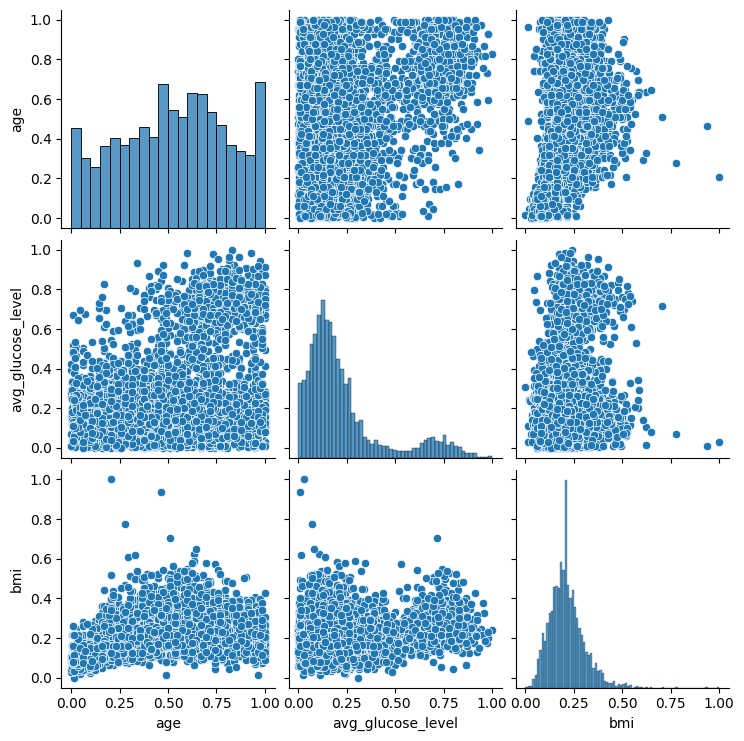

In [57]:
# Step 6: Feature Scaling


scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verify scaled data
print("\nScaled numerical columns (first 5 rows):")
print(data[numerical_cols].head())

sns.pairplot(data[['age', 'avg_glucose_level', 'bmi']])
plt.show()

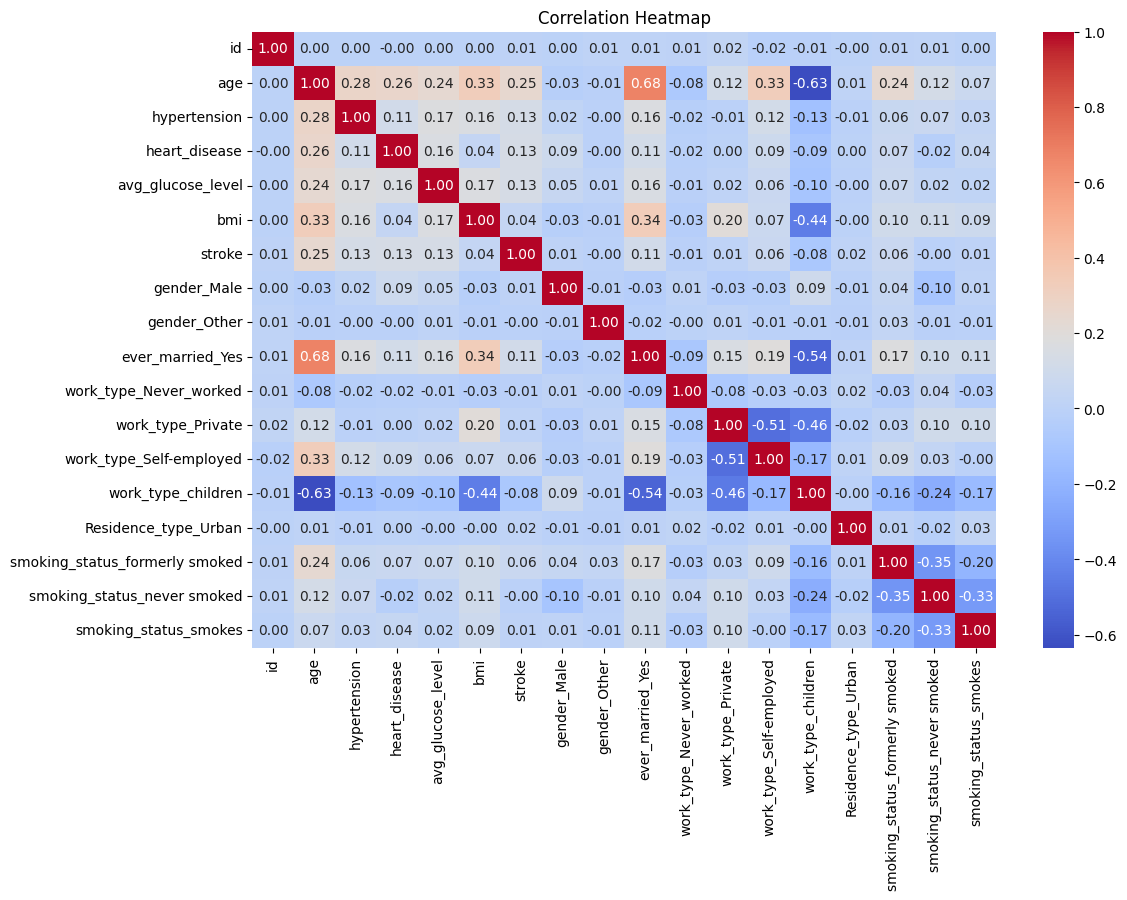

In [58]:
corr_matrix = data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Feature Preparation
X = data.drop(columns=['id', 'stroke'])  # Features
y = data['stroke']  # Target variable

# Ensure categorical columns are properly encoded
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
X = pd.get_dummies(X, drop_first=True)  # One-hot encode remaining categorical columns

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Model 1: XGBoost ---
# Initialize the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgboost_model.predict(X_test)

# Calculate and display performance metrics
print("XGBoost Model (Without Tuning) Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# --- Model 2: Random Forest ---
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)

# Calculate and display performance metrics
print("\nRandom Forest Model (Without Tuning) Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


XGBoost Model (Without Tuning) Evaluation:
Accuracy: 0.9432485322896281
Precision: 0.25
Recall: 0.08
F1 Score: 0.12121212121212122
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.25      0.08      0.12        75

    accuracy                           0.94      1533
   macro avg       0.60      0.53      0.55      1533
weighted avg       0.92      0.94      0.93      1533


Random Forest Model (Without Tuning) Evaluation:
Accuracy: 0.9517286366601435
Precision: 0.6
Recall: 0.04
F1 Score: 0.075
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       0.60      0.04      0.07        75

    accuracy                           0.95      1533
   macro avg       0.78      0.52      0.53      1533
weighted avg       0.94      0.95      0.93      1533



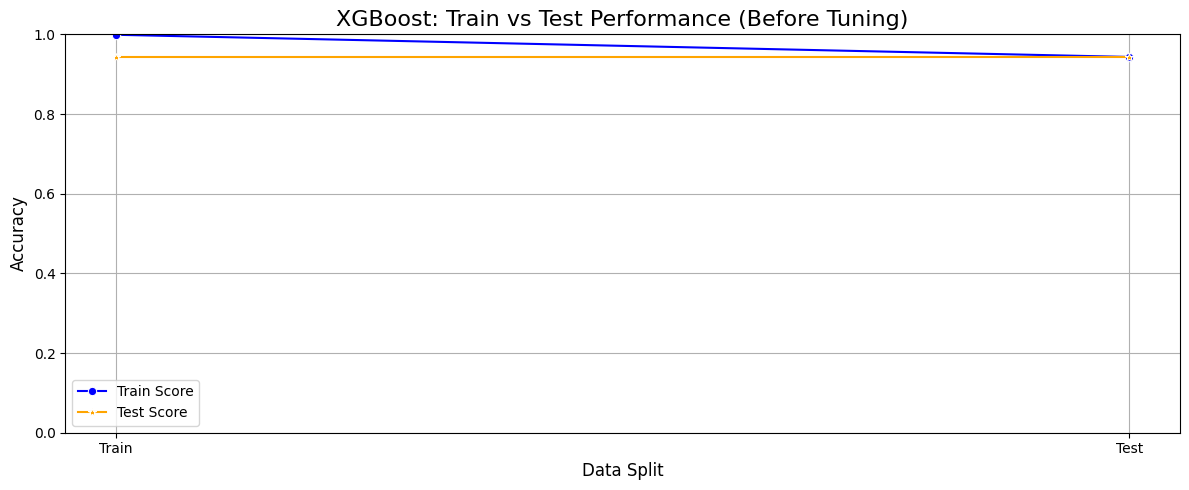

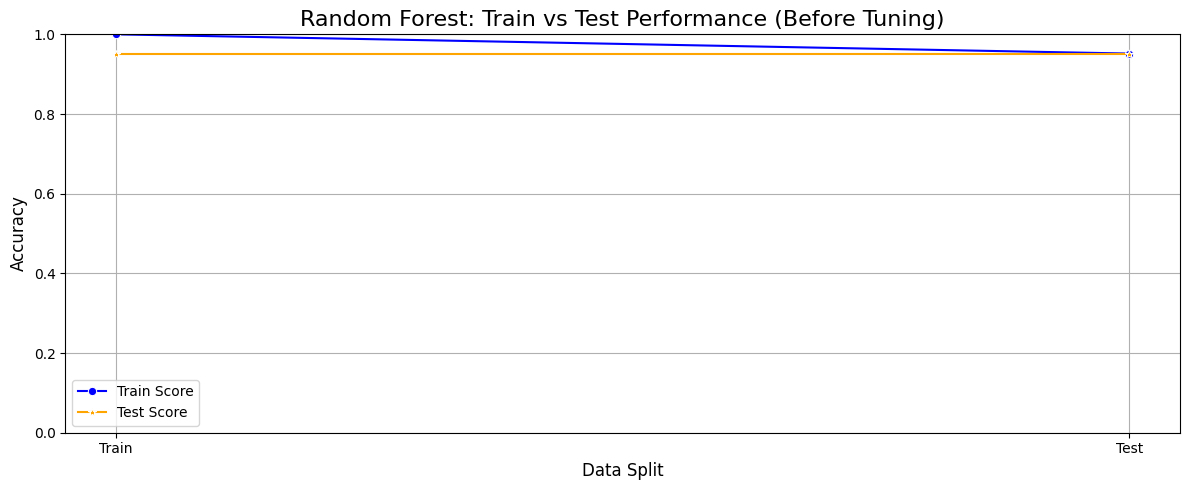

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Before Tuning - XGBoost Model Evaluation
xgboost_train_score = xgboost_model.score(X_train, y_train)
xgboost_test_score = accuracy_score(y_test, y_pred_xgb)

# Before Tuning - Random Forest Model Evaluation
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = accuracy_score(y_test, y_pred_rf)

# XGBoost Graph - Before Tuning
plt.figure(figsize=(12, 5))
sns.lineplot(x=['Train', 'Test'], y=[xgboost_train_score, xgboost_test_score], marker='o', label='Train Score', color='blue')
sns.lineplot(x=['Train', 'Test'], y=[xgboost_test_score, xgboost_test_score], marker='*', label='Test Score', color='orange')
plt.title('XGBoost: Train vs Test Performance (Before Tuning)', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Data Split', fontsize=12)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest Graph - Before Tuning
plt.figure(figsize=(12, 5))
sns.lineplot(x=['Train', 'Test'], y=[rf_train_score, rf_test_score], marker='o', label='Train Score', color='blue')
sns.lineplot(x=['Train', 'Test'], y=[rf_test_score, rf_test_score], marker='*', label='Test Score', color='orange')
plt.title('Random Forest: Train vs Test Performance (Before Tuning)', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Data Split', fontsize=12)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best XGBoost Model Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}

XGBoost Model (With Tuning) Evaluation:
Accuracy: 0.9367253750815394
Precision: 0.28
Recall: 0.18666666666666668
F1 Score: 0.224
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1458
           1       0.28      0.19      0.22        75

    accuracy                           0.94      1533
   macro avg       0.62      0.58      0.60      1533
weighted avg       0.93      0.94      0.93      1533

ROC AUC Score: 0.5809876543209876
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Random Forest Model Parameters: {'rf__bootstrap': True, 'rf__max_depth': 7, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}

Random Forest Model (With Tuning) Evaluation:
Accuracy: 0.8082191780821918
Precision: 0.13131313131313

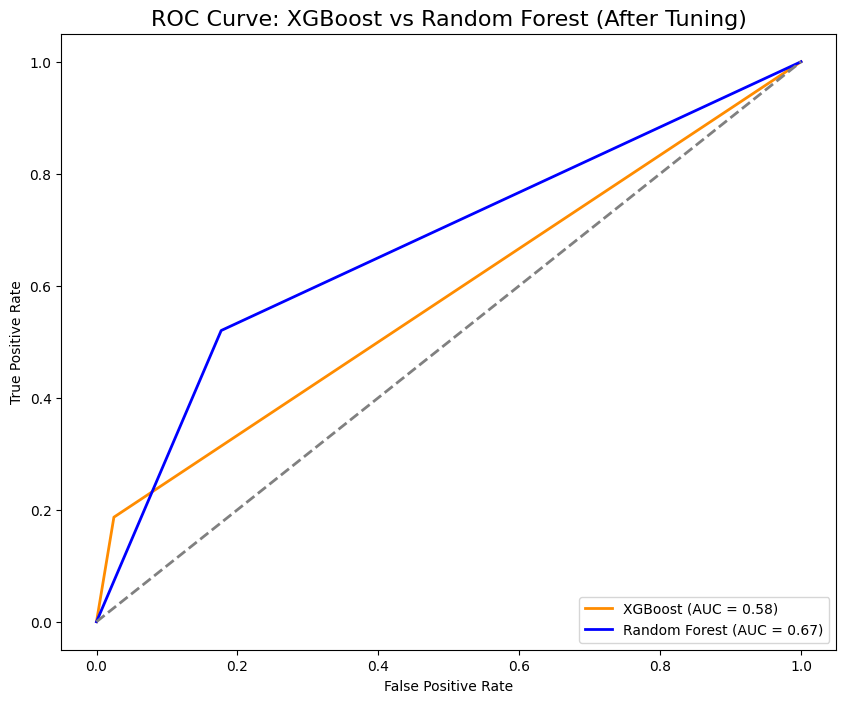

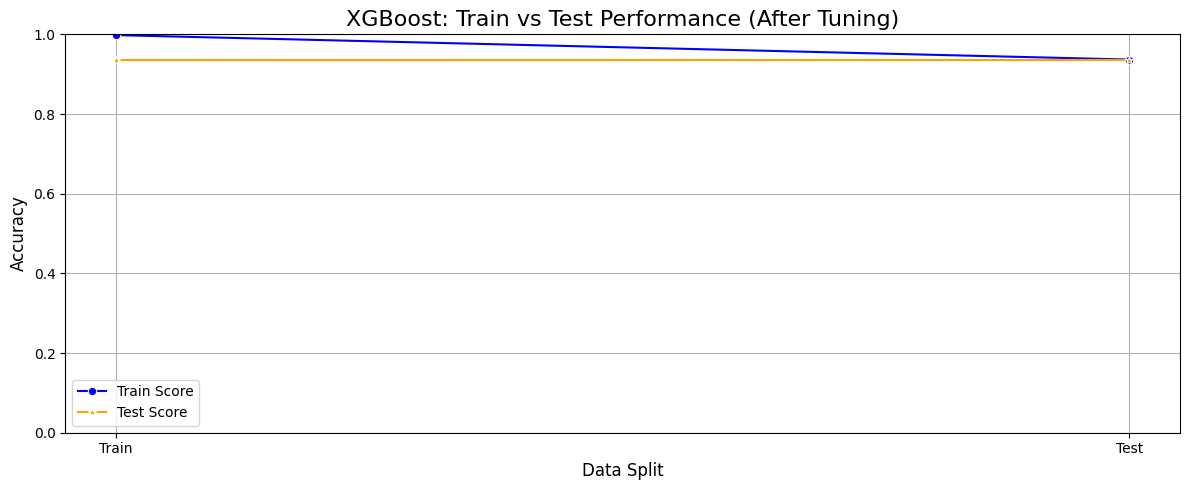

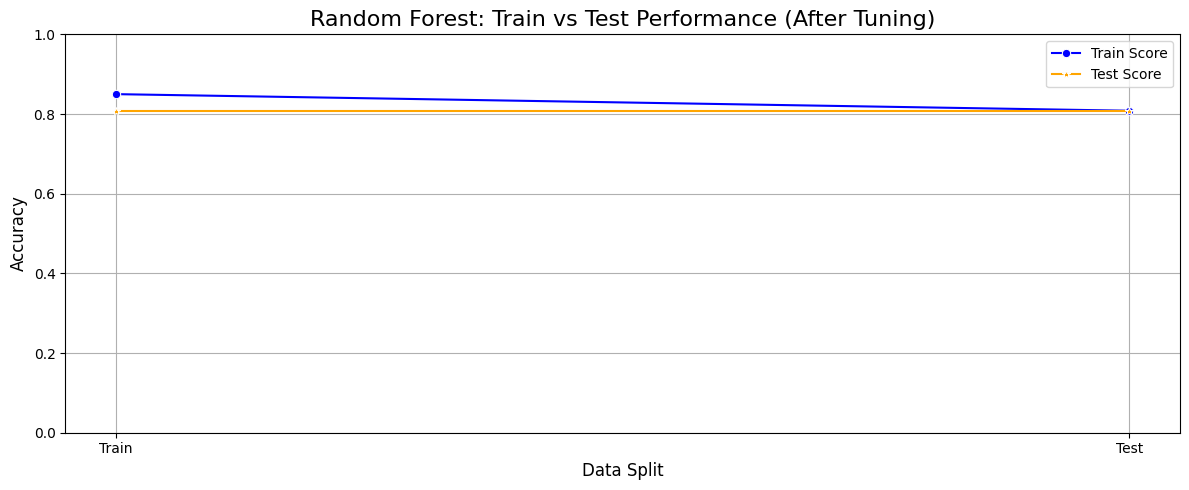

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assuming 'X' is your feature set and 'y' is the target variable
# Example of loading the dataset:
# data = pd.read_csv('your_dataset.csv')
# X = data.drop(columns=['target_column', 'id'])  # drop the target column and any non-feature columns
# y = data['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Model 1: XGBoost with Hyperparameter Tuning ---
# Initialize the SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with imputer and XGBoost model
xgb_pipeline = Pipeline([
    ('imputer', imputer),
    ('xgb', xgb.XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train)))  # Adjust scale_pos_weight for class imbalance
])

# Hyperparameter tuning using GridSearchCV
param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_grid = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

# Best parameters and evaluation for XGBoost
print("Best XGBoost Model Parameters:", xgb_grid.best_params_)
y_pred_xgb = xgb_grid.predict(X_test)

# Calculate and display performance metrics for XGBoost
print("\nXGBoost Model (With Tuning) Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, zero_division=1))  # Added zero_division=1 to avoid precision warning
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))

# --- Model 2: Random Forest with Hyperparameter Tuning ---
# Create a pipeline with imputer and Random Forest model
rf_pipeline = Pipeline([
    ('imputer', imputer),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))  # Using balanced class weights
])

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid_rf = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [3, 5, 7],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__bootstrap': [True, False]
}
rf_grid = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

# Best parameters and evaluation for Random Forest
print("\nBest Random Forest Model Parameters:", rf_grid.best_params_)
y_pred_rf = rf_grid.predict(X_test)

# Calculate and display performance metrics for Random Forest
print("\nRandom Forest Model (With Tuning) Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, zero_division=1))  # Added zero_division=1 to avoid precision warning
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

# --- Visual Comparison: ROC Curve and Performance Graphs ---
from sklearn.metrics import roc_curve, auc

# Compute ROC curve for XGBoost and Random Forest
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# Compute AUC for XGBoost and Random Forest
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('ROC Curve: XGBoost vs Random Forest (After Tuning)', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# --- Train vs Test Performance Comparison ---
xgboost_train_score = xgb_grid.score(X_train, y_train)
xgboost_test_score = accuracy_score(y_test, y_pred_xgb)

rf_train_score = rf_grid.score(X_train, y_train)
rf_test_score = accuracy_score(y_test, y_pred_rf)

# XGBoost Graph - After Tuning
plt.figure(figsize=(12, 5))
sns.lineplot(x=['Train', 'Test'], y=[xgboost_train_score, xgboost_test_score], marker='o', label='Train Score', color='blue')
sns.lineplot(x=['Train', 'Test'], y=[xgboost_test_score, xgboost_test_score], marker='*', label='Test Score', color='orange')
plt.title('XGBoost: Train vs Test Performance (After Tuning)', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Data Split', fontsize=12)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest Graph - After Tuning
plt.figure(figsize=(12, 5))
sns.lineplot(x=['Train', 'Test'], y=[rf_train_score, rf_test_score], marker='o', label='Train Score', color='blue')
sns.lineplot(x=['Train', 'Test'], y=[rf_test_score, rf_test_score], marker='*', label='Test Score', color='orange')
plt.title('Random Forest: Train vs Test Performance (After Tuning)', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Data Split', fontsize=12)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


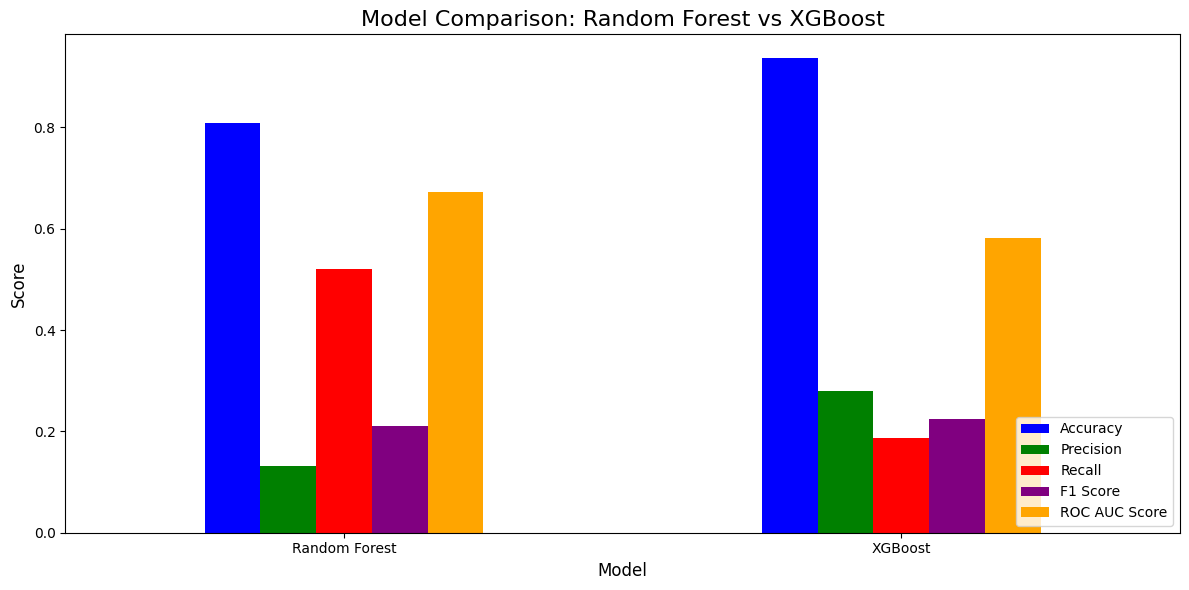

In [76]:
# Performance metrics for both models
models = ['Random Forest', 'XGBoost']
accuracies = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)]
precisions = [
    precision_score(y_test, y_pred_rf, zero_division=1),
    precision_score(y_test, y_pred_xgb, zero_division=1)
]
recalls = [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_xgb)]
f1_scores = [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_xgb)]
roc_auc_scores = [roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_xgb)]

# Create a dataframe for better visualization
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'ROC AUC Score': roc_auc_scores
})

# Plotting the comparison
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 6), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Comparison: Random Forest vs XGBoost', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()
